In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import wrangle
from env import get_db_url

import pydataset
import sklearn
import sklearn.preprocessing as pre
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
# data splitting
train, test = train_test_split(df, test_size=.2, random_state=198)


In [5]:
train.shape

(1712188, 7)

In [6]:
test.shape

(428047, 7)

### visualizations of un-scaled

<AxesSubplot:ylabel='Frequency'>

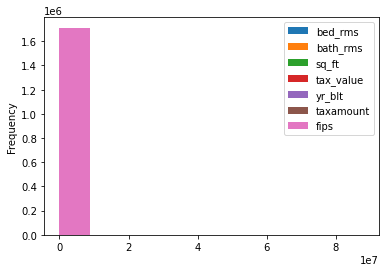

In [7]:
train.plot.hist()

<AxesSubplot:ylabel='Frequency'>

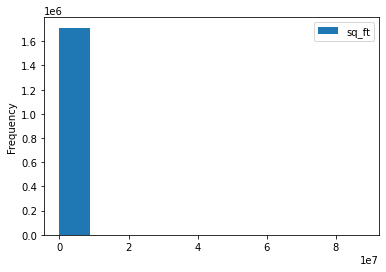

In [8]:
train.plot.hist(column=["sq_ft"])

In [9]:
train_scaled = train.copy()

In [10]:
train_scaled.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,1350.0,218743.0,1951.0,2723.20,6037.0
1899587,3.0,2.0,1376.0,319263.0,1930.0,4483.15,6037.0
962988,3.0,2.0,2425.0,645590.0,1954.0,9217.95,6037.0
778760,2.0,1.0,1124.0,204306.0,1931.0,2613.04,6037.0
128405,3.0,2.0,1695.0,524415.0,1986.0,6329.36,6059.0


In [11]:
train_scaled.shape

(1712188, 7)

In [73]:
cat_cols = ['bed_rms', 'bath_rms', 'yr_blt']
cont_cols = ['sq_ft', 'taxamount', 'tax_value']

#  1. visual comparisons scaled vs. unscaled

#### Min-Max

In [12]:
train_scaled_MM = train_scaled.copy()

In [13]:
cols = ['sq_ft', 'yr_blt', 'taxamount']

scaler_MM = MinMaxScaler()

train_scaled_MM[cols]=scaler_MM.fit_transform(train_scaled_MM[cols])

In [14]:
train_scaled_MM.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,0.001416,218743.0,0.697674,0.002582,6037.0
1899587,3.0,2.0,0.001443,319263.0,0.600000,0.004255,6037.0
962988,3.0,2.0,0.002545,645590.0,0.711628,0.008756,6037.0
778760,2.0,1.0,0.001179,204306.0,0.604651,0.002478,6037.0
128405,3.0,2.0,0.001778,524415.0,0.860465,0.006010,6059.0


In [15]:
train.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,1350.0,218743.0,1951.0,2723.20,6037.0
1899587,3.0,2.0,1376.0,319263.0,1930.0,4483.15,6037.0
962988,3.0,2.0,2425.0,645590.0,1954.0,9217.95,6037.0
778760,2.0,1.0,1124.0,204306.0,1931.0,2613.04,6037.0
128405,3.0,2.0,1695.0,524415.0,1986.0,6329.36,6059.0


(array([1.712187e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e+00, 9.525850e+04, 1.905160e+05, 2.857735e+05,
        3.810310e+05, 4.762885e+05, 5.715460e+05, 6.668035e+05,
        7.620610e+05, 8.573185e+05, 9.525760e+05]),
 <BarContainer object of 10 artists>)

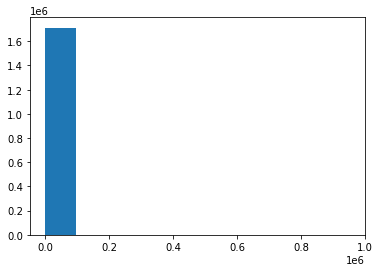

In [17]:
plt.hist(train.sq_ft)

(array([1.712187e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

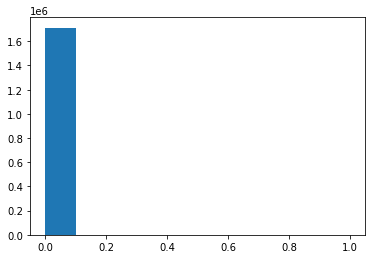

In [20]:
plt.hist(train_scaled_MM.sq_ft)

Text(0.5, 1.0, 'Scaled')

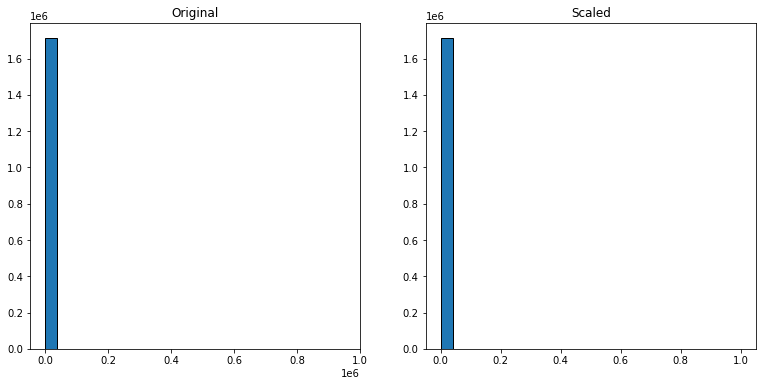

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.sq_ft, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.sq_ft, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

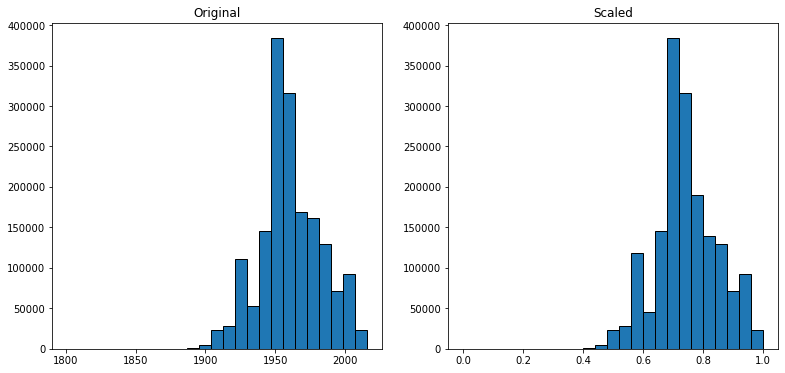

In [24]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yr_blt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.yr_blt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

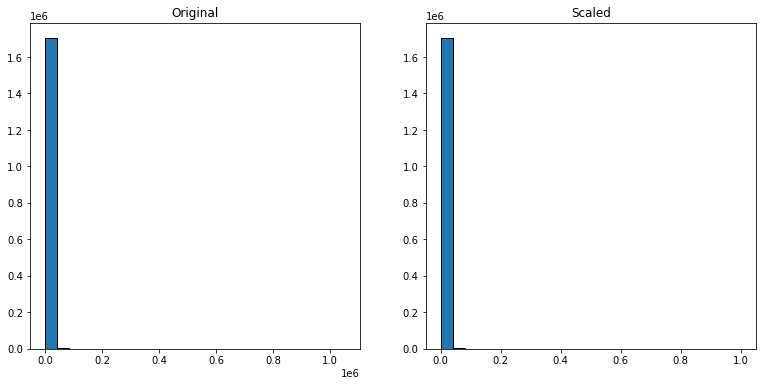

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_MM.taxamount, bins=25, ec='black')
plt.title('Scaled')

### scaler = sklearn.preprocessing.StandardScaler()


In [26]:
train_scaled_standard = train_scaled.copy()

In [27]:
scaler_standard = sklearn.preprocessing.StandardScaler()

In [28]:
train_scaled_standard[cols]=scaler_standard.fit_transform(train_scaled_standard[cols])

In [29]:
train_scaled_standard.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,-0.423643,218743.0,-0.450326,-0.372688,6037.0
1899587,3.0,2.0,-0.402199,319263.0,-1.398165,-0.145997,6037.0
962988,3.0,2.0,0.463001,645590.0,-0.314920,0.463870,6037.0
778760,2.0,1.0,-0.610045,204306.0,-1.353030,-0.386877,6037.0
128405,3.0,2.0,-0.139092,524415.0,1.129405,0.091805,6059.0


Text(0.5, 1.0, 'Scaled')

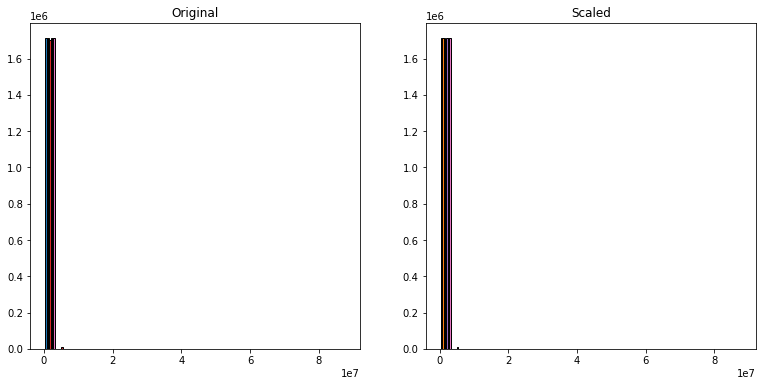

In [30]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

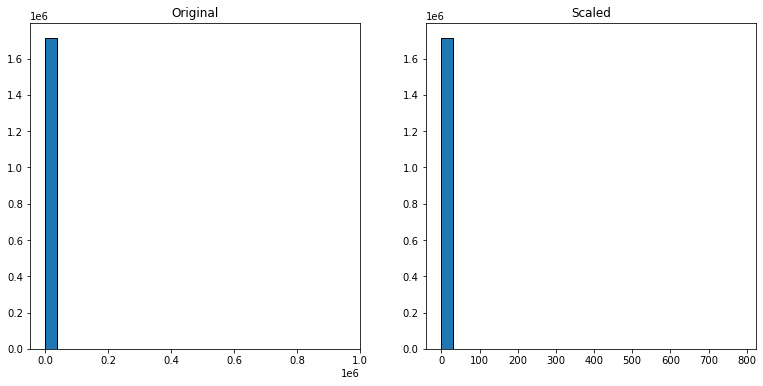

In [32]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.sq_ft, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.sq_ft, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

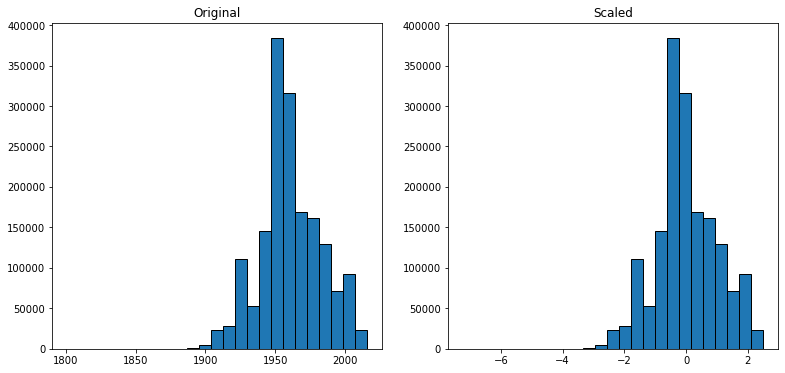

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yr_blt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.yr_blt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

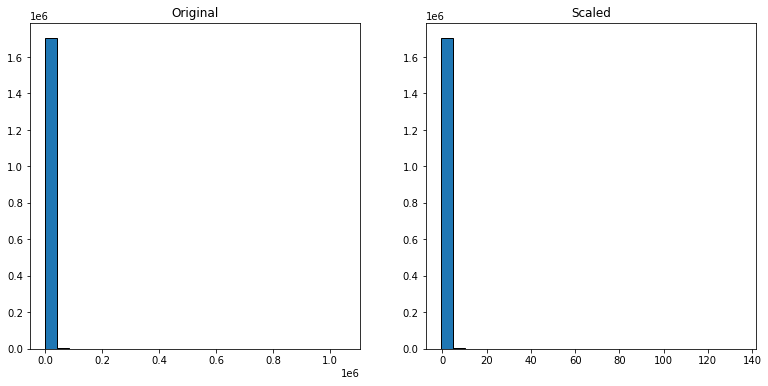

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard.taxamount, bins=25, ec='black')
plt.title('Scaled')

### scaler = robust

In [35]:
train_scaled_robust = train_scaled.copy()

In [36]:
scaler_robust = sklearn.preprocessing.RobustScaler()

In [37]:
train_scaled_robust[cols]=scaler_robust.fit_transform(train_scaled_robust[cols])

In [38]:
train_scaled_robust.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,-0.288118,218743.0,-0.259259,-0.358645,6037.0
1899587,3.0,2.0,-0.260778,319263.0,-1.037037,0.095710,6037.0
962988,3.0,2.0,0.842271,645590.0,-0.148148,1.318063,6037.0
778760,2.0,1.0,-0.525762,204306.0,-1.000000,-0.387084,6037.0
128405,3.0,2.0,0.074658,524415.0,1.037037,0.572335,6059.0


Text(0.5, 1.0, 'Scaled')

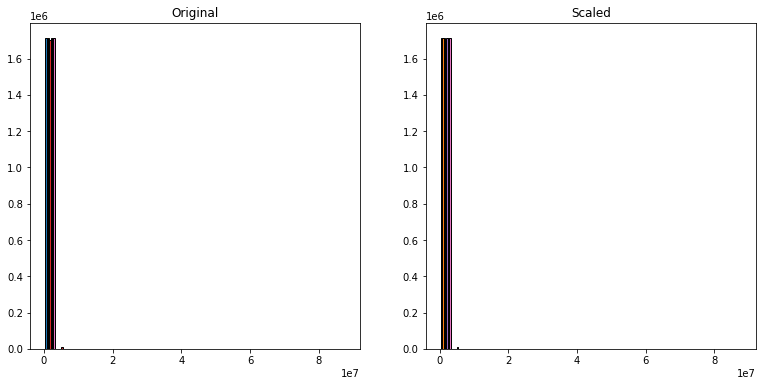

In [39]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust, bins=25, ec='black')
plt.title('Scaled')

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.sq_ft, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.sq_ft, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

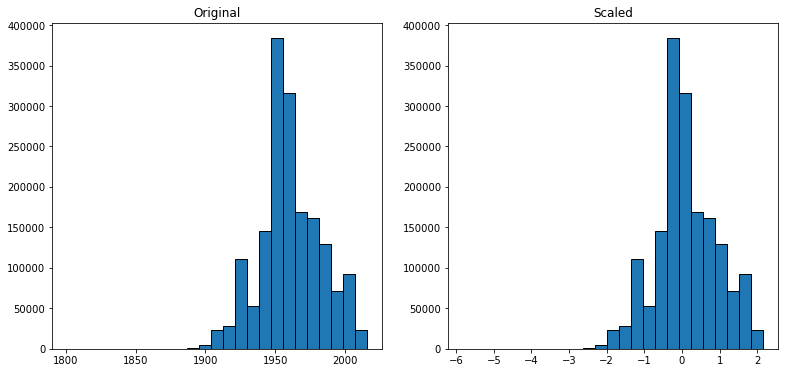

In [40]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.yr_blt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.yr_blt, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

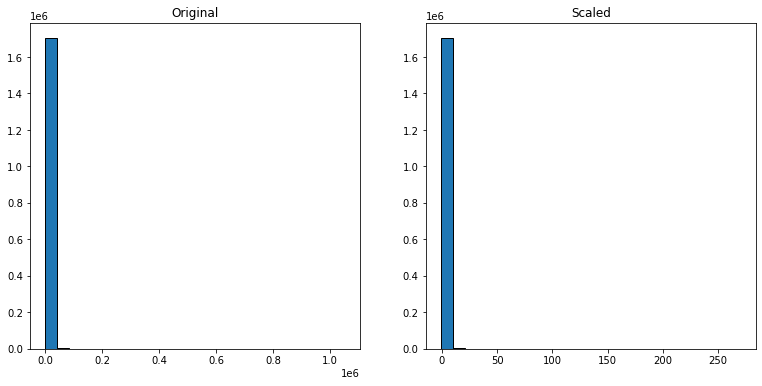

In [41]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust.taxamount, bins=25, ec='black')
plt.title('Scaled')

## other means of visualizations

<AxesSubplot:xlabel='yr_blt'>

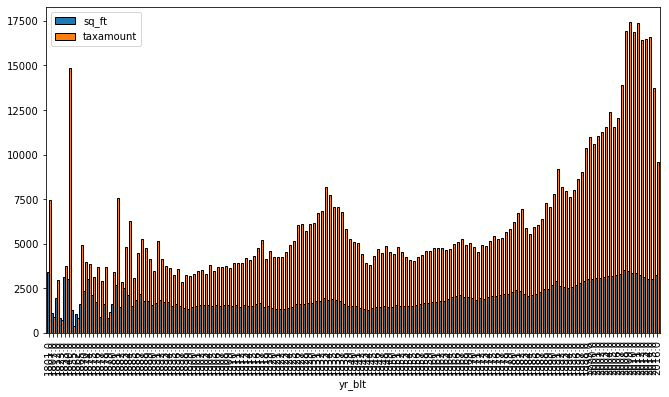

In [42]:

df[['sq_ft', 'yr_blt', 'taxamount']].groupby('yr_blt').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)



# 2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


#### inverse for MinMax

In [43]:
train_scaled_robust.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,-0.288118,218743.0,-0.259259,-0.358645,6037.0
1899587,3.0,2.0,-0.260778,319263.0,-1.037037,0.095710,6037.0
962988,3.0,2.0,0.842271,645590.0,-0.148148,1.318063,6037.0
778760,2.0,1.0,-0.525762,204306.0,-1.000000,-0.387084,6037.0
128405,3.0,2.0,0.074658,524415.0,1.037037,0.572335,6059.0


In [48]:
scaler = MinMaxScaler()
og_data = train_scaled_MM[['sq_ft']]
MM_scaled_data = scaler.fit_transform(og_data)

In [49]:
MM_scaled_data

array([[0.00258241],
       [0.00425526],
       [0.00875575],
       ...,
       [0.00432716],
       [0.00465742],
       [0.00233077]])

In [50]:
og_data[:5]

,taxamount
1383522,0.002582
1899587,0.004255
962988,0.008756
778760,0.002478
128405,0.006010


In [51]:
scaler.inverse_transform(scaled_data)[:5]

array([[0.00258241],
       [0.00425526],
       [0.00875575],
       [0.0024777 ],
       [0.00601011]])

In [52]:
scaled_data - og_data

,taxamount
1383522,-4.336809e-19
1899587,-8.673617e-19
962988,-1.734723e-18
778760,-4.336809e-19
128405,-1.734723e-18
...,...
483168,-1.734723e-18
330389,-8.673617e-19
292948,-8.673617e-19
137396,-8.673617e-19


#### inverse for robust data

In [60]:
R_scaler = RobustScaler()
og_R_data = train_scaled_robust[['sq_ft']]
R_scaled_data = scaler.fit_transform(og_R_data)

In [61]:
R_scaled_data[:5]

array([[-0.28811777],
       [-0.26077813],
       [ 0.84227129],
       [-0.52576236],
       [ 0.07465825]])

In [62]:
R_scaler.inverse_transform(R_scaled_data)[:5]

NotFittedError: This RobustScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [71]:
train_scaled.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1383522,3.0,3.0,1350.0,218743.0,1951.0,2723.20,6037.0
1899587,3.0,2.0,1376.0,319263.0,1930.0,4483.15,6037.0
962988,3.0,2.0,2425.0,645590.0,1954.0,9217.95,6037.0
778760,2.0,1.0,1124.0,204306.0,1931.0,2613.04,6037.0
128405,3.0,2.0,1695.0,524415.0,1986.0,6329.36,6059.0


In [75]:
train_scaled_2 = train_scaled.copy()

In [76]:
quantile = pre.QuantileTransformer(output_distribution='normal')


In [78]:
train_scaled_2[['bedrooms_quantile','bathrooms_quantile', 'year_built_quantile']] = quantile.fit_transform(train[cat_cols])


KeyError: 'sq_ft_quantile'

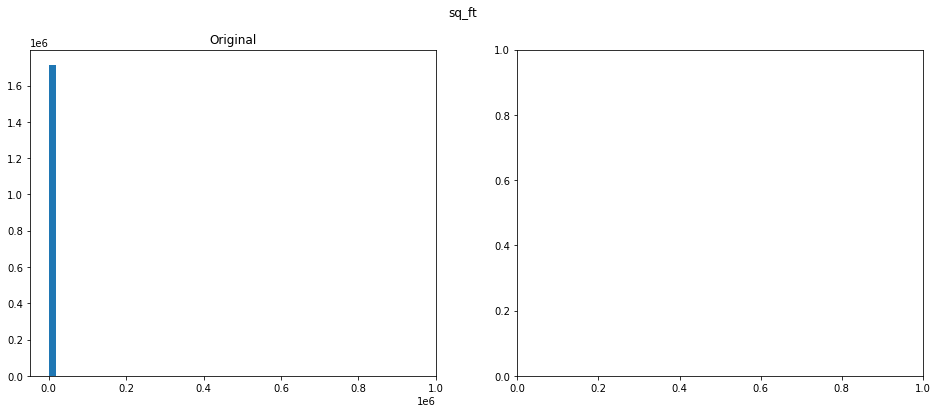

In [83]:
for col in cont_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled_2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(train_scaled_2[f'{col}_quantile'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()